# EDA for sentiment, topic, and reporting correlation among various global media agencies

This section aims to revel trends and patterns of our data inorder to gain a deeper understanding. Using the insights we gain here, we can further extract various information on our next section.


## Tools

I'll be using the library pandas, pyplot and seaborn to facilitate in data manipulation and performing initial assessment of the dataset's strucutre


## Approach

### Preparing Our Data

#### Analyzing and Importing our data


In [1]:
# preparing and importing the necessary packages 
from loader import NewsDataLoader
import pandas as pd
import re
import sys
import os
# Manually setting the correct path to src directory
sys.path.append("../../../OFFICAL WEEK0")

from src.loader import NewsDataLoader
import src.utils as utils

In [2]:
# defining the appropriate path for each path
path = {
    "rating":os.environ['RATING_PATH'],
    "domains_location":os.environ['DOMAINS_LOCATION_PATH'],
    "traffic":os.environ['TRAFFIC_PATH']}

# initiating the newsdataloader class
data_loader = NewsDataLoader(path)

{'rating': '../../data/rating.csv', 'domains_location': '../../data/domains_location.csv', 'traffic': '../../data/traffic.csv'}


In [3]:
# importing relevant data by using the NewsDataloader class 
rating = data_loader.get_data("rating")

domains_location = data_loader.get_data("domains_location")

traffic = data_loader.get_data("traffic")

#### Analysing the various data that has been imported
we analyse rating each data set to gain mroe information about the data

In [4]:
print(rating.columns)
print(traffic.columns)
print(domains_location.columns)

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')
Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')
Index(['SourceCommonName', 'location', 'Country'], dtype='object')


In [5]:
# checking out the data
rating.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [6]:
traffic.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892


In [7]:
domains_location.head()

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [8]:
# checking out the data quantity
print(rating.shape)
print(traffic.shape)
print(domains_location.shape)

(58356, 13)
(1000000, 12)
(37802, 3)


#### Checking for data purity
checking for missing and duplicated values

In [9]:
print("Count of missing values in rating \n",rating.isnull().sum())
print("Count of missing values in domains_location \n",domains_location.isnull().sum())
print("Count of missing values in traffic \n",traffic.isnull().sum())

Count of missing values in rating 
 article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64
Count of missing values in domains_location 
 SourceCommonName    0
location            0
Country             1
dtype: int64
Count of missing values in traffic 
 GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64


Since the main attributes which are artices, source_name, title and content are not null we'll just have to keep the null values for the other columns

In [10]:
# identifying the type of data in each dataset
print("Rating Column Data types \n",rating.dtypes)
print("Traffic Column Data types \n",traffic.dtypes)
print("Domains Location Column Data types \n",domains_location.dtypes)

Rating Column Data types 
 article_id          int64
source_id          object
source_name        object
author             object
title              object
description        object
url                object
url_to_image       object
published_at       object
content            object
category           object
article            object
title_sentiment    object
dtype: object
Traffic Column Data types 
 GlobalRank         int64
TldRank            int64
Domain            object
TLD               object
RefSubNets         int64
RefIPs             int64
IDN_Domain        object
IDN_TLD           object
PrevGlobalRank     int64
PrevTldRank        int64
PrevRefSubNets     int64
PrevRefIPs         int64
dtype: object
Domains Location Column Data types 
 SourceCommonName    object
location            object
Country             object
dtype: object


In [11]:
# checking to see the amount of articles for each sources
rating.source_name.value_counts()

source_name
ETF Daily News                  16746
The Times of India               7504
GlobeNewswire                    5423
Globalsecurity.org               3119
Forbes                           2784
BBC News                         2113
ABC News                         2058
Business Insider                 2034
The Punch                        1800
Al Jazeera English               1664
Marketscreener.com               1362
Phys.Org                         1263
International Business Times     1207
The Indian Express               1176
RT                               1128
NPR                               981
Deadline                          932
Digital Trends                    784
Boing Boing                       713
CNA                               674
Time                              600
Android Central                   522
Gizmodo.com                       388
ReadWrite                         324
Euronews                          286
Wired                             270


In [12]:
# checking to see the various categories in the category column
rating.category.value_counts()

category
Stock          3687
Canada         2066
Health         2046
Real estate    2030
Technology     1993
               ... 
Andorra           3
Honduras          3
Cabo Verde        3
Martinique        2
Réunion           2
Name: count, Length: 256, dtype: int64

#### Feature Engineering
obtaining the domain of each rating by extracting it from the url

In [13]:
rating["domain"] = rating["url"].apply(lambda x: utils.extract_keywords(word=x,pattern =r'https?://(?:www\.)?([^/]+)'))

obtaining the title's length

In [14]:
rating['title_length']=rating['title'].apply(lambda x:len(str(x)))

In [15]:
rating["title_length"].describe()

count    58356.000000
mean        76.767033
std         26.009651
min         12.000000
25%         60.000000
50%         73.000000
75%         89.000000
max        326.000000
Name: title_length, dtype: float64

obtaining the content's length

In [16]:
rating['content_length']=rating['content'].apply(lambda x:len(str(x)))

In [17]:
rating["content_length"].describe().T

count    58356.000000
mean       207.838920
std         28.566682
min         25.000000
25%        213.000000
50%        214.000000
75%        214.000000
max        216.000000
Name: content_length, dtype: float64

In [18]:
# exploring the new feature
rating["domain"].head()

0             forbes.com
1    channelnewsasia.com
2               time.com
3               phys.org
4      digitaltrends.com
Name: domain, dtype: object

In [19]:
# Exploring the sentiments column
rating['title_sentiment'].value_counts()

title_sentiment
Neutral     42926
Negative     9133
Positive     6297
Name: count, dtype: int64

0    42926
1     9133
2     6297
Name: count, dtype: int64
0     Neutral
1    Negative
2    Positive
Name: category, dtype: object


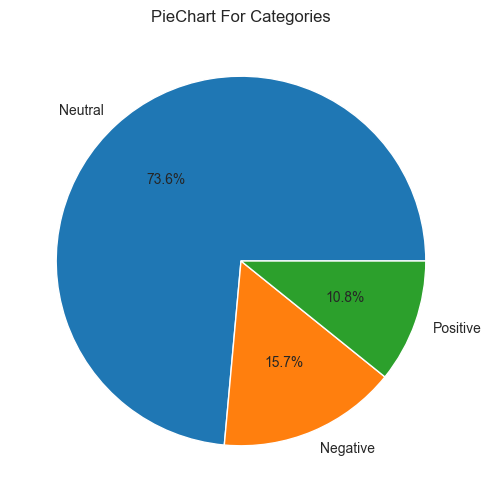

In [20]:
# get the value counts
sentiment_counts = rating['title_sentiment'].value_counts()
sentiment_counts = sentiment_counts.reset_index()
sentiment_counts.columns = ['category', 'count']
    
utils.pie_chart(title="PieChart For Categories",count=sentiment_counts["count"],labels=sentiment_counts["category"])

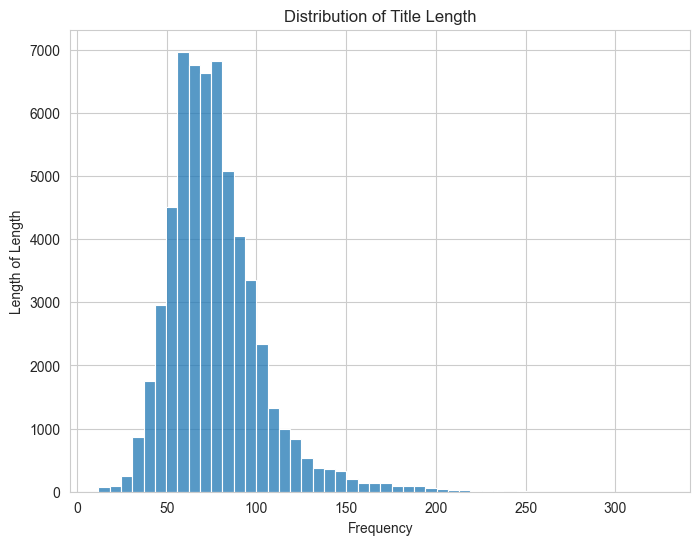

In [21]:
utils.histogram(rating,"title_length","Distribution of Title Length","Frequency","Length of Length")

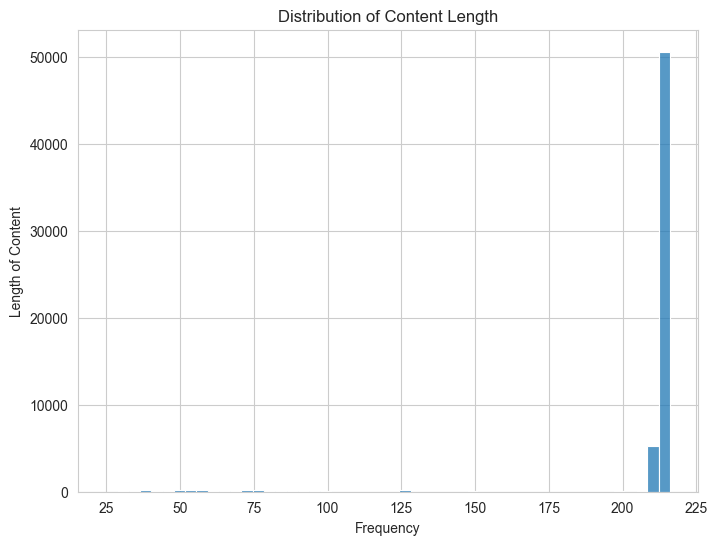

In [22]:
utils.histogram(rating,"content_length","Distribution of Content Length","Frequency","Length of Content")

## Trend Analysis

We've done the necessary cleaining so we will now proceed with considering with indentifying different patterns that lie within our data

Quantitative Descriptions about different countries and websites 